# N-Reinas
## Integrantes:
#### Mauricio Santiago Valdovinos Morales
#### Carlos Xavier Gallardo Rosas
#### Sergio ALberto Arce Ruelas

In [4]:
import pickle
import numpy as np
import random
import collections
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [5]:
np.random.seed(69)
random.seed(69)

In [6]:
class Individual:
    def __init__(self,N,fila=None): #Constructor de la clase
        self.N = N #Numero de Reinas
        self.fila = np.random.permutation(N)[:N] #lista con las posiciones de las reinas
            
    def __repr__(self):
        return str(self.fila)
    
    def fitness(self): #Funcion de aptitud en donde se suman la cantidad de reinas que pueden comerse
        return self.laterales() + self.diagonal()
    
    def laterales(self): #Busca cuantas reinas a los lados de cada una
        nl = 0
        for i in self.fila:
            for j in self.fila:
                if i == j:
                    nl+=1
        nl = nl - self.N
        return nl
    
    def diagonal(self):# Busca cuantas reinas hay en las diagonales de cada una
        rd = 0
        for i in range(len(self.fila)-1):
            
            if i != self.N and self.fila[i] != self.N-1:
                #Diagonal Abajo
                for n in range(1,len(self.fila)):
                        if n+i < self.N and self.fila[i]+n == self.fila[n+i]:
                            rd+=1
                            
            if i != self.N and self.fila[i] != 0:
                #Diagonal Arriba
                for n in range(1,len(self.fila)):
                        if n+i < self.N and self.fila[i]-n == self.fila[n+i]:
                            rd+=1
        return rd

def crossover(P1,P2): #Funcion de cruce donde se generan los hijos o la nueva generacion
    t1 = np.copy(P1.fila)
    t2 = np.copy(P2.fila)
    point = random.randint(0,5) #punto donde se realizara el corte de los padres para generar los hijos
    h1 = np.copy(np.concatenate((t1[:point],t2[point:])))
    h2 = np.copy(np.concatenate((t2[:point],t1[point:])))
    return Individual(P1.N,h1), Individual(P2.N,h2)

def mutation(I): #Funcion de mutacion
    point = random.randint(0,I.N-1)
    while True:
        new = random.choice(range(I.N-1))
        if new != I.fila[point]: #Se verifica que el numero aleatorio generado no sea el mismo que el que ya estaba
            I.fila[point] = new
            break

In [7]:
#DIbujar una grafica con las estadisticas de los fitness de todas las generaciones
def Grafica(s):
    plt.close('all')
    plt.plot(s['max'],'g',label = 'max')
    plt.plot(s['min'],'r',label = 'min')
    plt.plot(s['avg'],'b',label = 'avg')
    plt.legend()
    plt.show()

In [8]:
#Algoritmo Genetico
def AlGenetico(R):
    G = 1000#Num. Generaciones
    N = 10 #Poblacion
    pM = .1 #Probabilidad de mutacion
    #Crear la poblacion
    population = [Individual(R) for i in range(N)]
    #Diccionario con las estadisticas de las generaciones
    stats = {'max':[],'min':[],'avg':[]}
    for g in range(G):
        fitness_values = [x.fitness() for x in population]
        stats['max'].append(max(fitness_values)) 
        stats['min'].append(min(fitness_values))
        stats['avg'].append(sum(fitness_values)/N)
        hijos = []
        #print(population)
        for i in range(N//2):
            idx_p1 = random.randint(0,N-1)#elegir los tableros que tendran nueva generacion de forma aleatoria
            idx_p2 = random.randint(0,N-1)
            while True:
                if idx_p1 != idx_p2:
                    break
                idx_p2 = random.randint(0,N-1)
            h1,h2 = crossover(population[idx_p1],population[idx_p2]) #Sale la nueva generacion
            if random.random() <= pM: #ver si se le el hijo uno muta
                mutation(h1)
            if random.random() <= pM: #ver si se le el hijo dos muta
                mutation(h2)
            hijos.append(h1)
            hijos.append(h2)

        todos = population+hijos
        todos.sort(key=lambda x:+x.fitness()) #Ordenar toda la poblacion de menor a mayor segun el fitness
        population = todos[:N] #agarrar los primeros 10 de toda la poblacion
    return population,stats

In [10]:
#Generar tablero con 1 y 0
def Tablero(n): 
    for i in range(n):
        aux = ''
        for j in range(n):
            if i%2 == 0:
                if j%2 == 0:
                    aux = str(aux) + '0'
                else:
                    aux = str(aux) + '1'
            else:
                if j%2 == 0:
                    aux = str(aux) + '1'
                else:
                    aux = str(aux) + '0'
        matriz.append(aux)

In [9]:
#posicionar las reinas en el tablero generado segun el reultado final
def Queen(matriz,reinas): 
    s = ''
    for i in range(Reinas):
        s = matriz[reinas.fila[i]]
        s = list(s)
        s[i] = '2'
        s = ''.join(s)
        matriz[reinas.fila[i]] = s

In [11]:
#Dibujar el tablero en base a un archivo de texto generado con el tablero
def plot_Tablero(tablero,sequence=None): 
    M = np.loadtxt(tablero) 
    cmap = mpl.cm.get_cmap('Greys') #viridis,
    norm = mpl.colors.Normalize(vmin=0,vmax=2)
    labels = 'Queen'
    handles=[mpatches.Patch(color= 'black', label=labels)]
    plt.close('all')
    plt.figure(figsize=(10,10))
    ax = plt.gca()    
    plt.imshow(M,origin='upper', interpolation='nearest', cmap=cmap)
    if sequence != None:
        for idx,s in enumerate(sequence):        
            plt.text(s[0], s[1], idx,
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='black')
    legend = plt.legend(loc='best',handles=handles,bbox_to_anchor=(1.3,1))     
    plt.show()

	N-REINAS
Numero de reinas: 
8
[4 6 3 0 2 7 5 1] Fitness:  0
[3 6 2 7 1 4 0 5] Fitness:  0
[6 2 0 5 7 4 1 3] Fitness:  0
[4 6 1 5 2 0 7 3] Fitness:  0
[2 4 1 7 0 6 3 5] Fitness:  0
[4 7 3 0 6 1 5 2] Fitness:  0
[4 6 1 3 7 0 2 5] Fitness:  0
[2 5 1 6 4 0 7 3] Fitness:  0
[5 3 6 0 2 4 1 7] Fitness:  0
[4 7 3 0 6 1 5 2] Fitness:  0
	Grafica


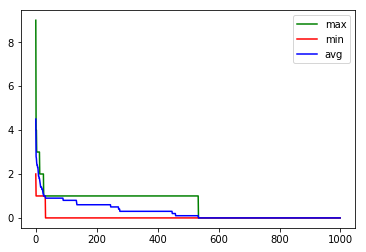

01010101
10101010
01010101
10101010
01010101
10101010
01010101
10101010
01020101
10101012
01012101
10201010
21010101
10101020
02010101
10101210


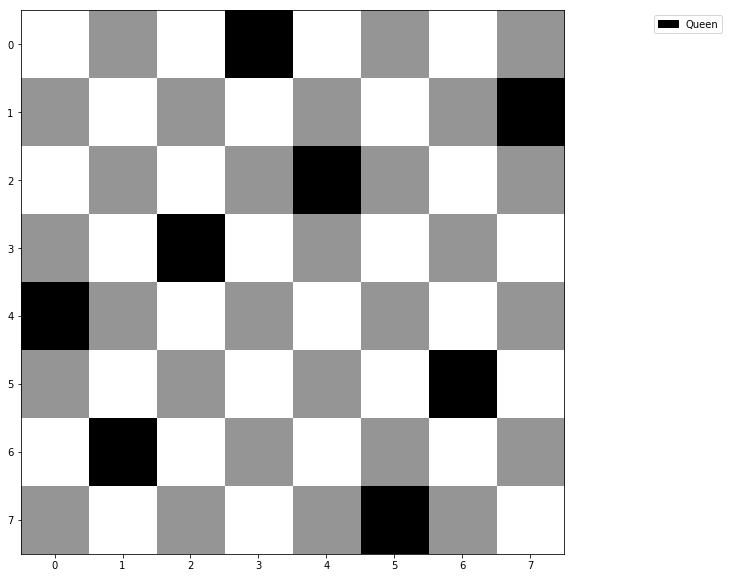

In [14]:
if __name__ == "__main__":
    matriz = []
    print("\tN-REINAS")
    print("Numero de reinas: ")
    Reinas = int(input()) #Numero de Reinas
    p,s = AlGenetico(Reinas)
    for I in p:
        print(I,"Fitness: ",I.fitness())
    print("\tGrafica")
    Grafica(s)
    Tablero(Reinas)
    Queen(matriz,p[0])
    f = open ('TableroNReinas.txt','w') #Abrir el archivo de texto o crearlo en caso de que no exista
    for i in matriz:
        for j in range(len(i)):
            f.write(i[j]+'\t')
        f.write('\n')
    f.close()
    plot_Tablero('TableroNReinas.txt')